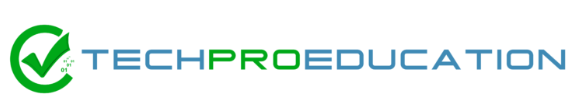

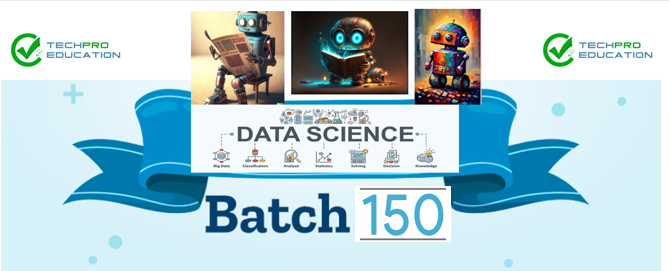

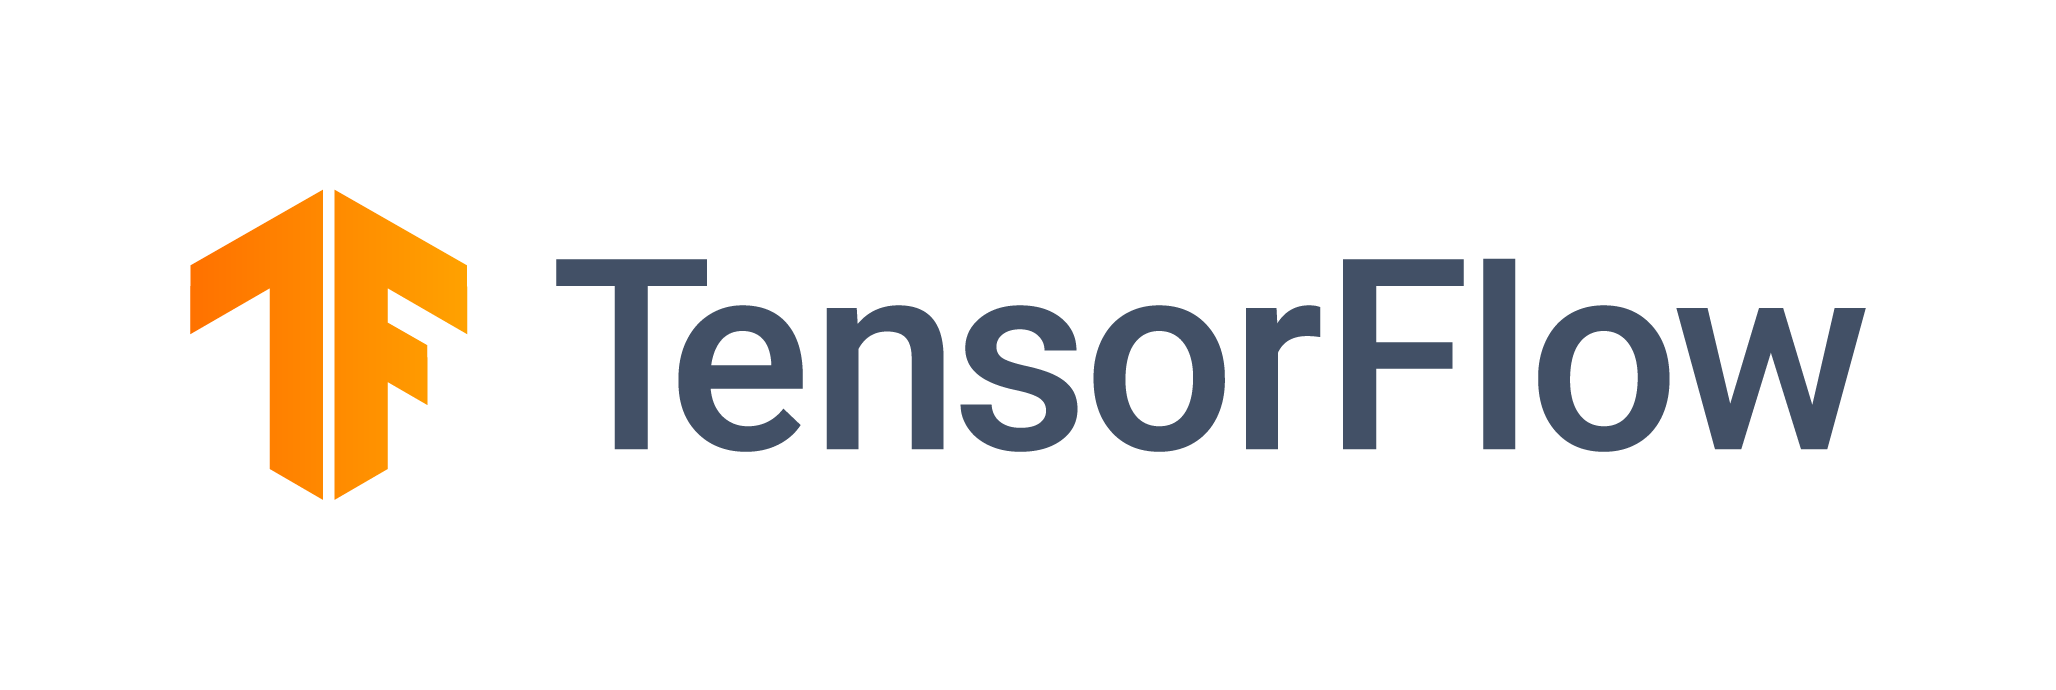

TensorFlow, Google tarafından geliştirilen ve sürdürülen açık kaynaklı bir derin öğrenme kitaplığıdır. Bir dizi makine öğrenimi görevini gerçekleştiren veri akışı programlaması sunar. 

TensorFlow’un anlamı, açık kaynak kodlarını içerisinde barındıran derin öğrenme (Deep learning) kütüphanesi olarak ifade edilmektedir. TensorFlow’un esnek yapısı, tek API (Application Programming İnterface), uygulama programlama arayüzü ile tüm platformlarda hesapların yapılmasını sağlamaktadır. 

TensorFlow, bir ya da daha fazla merkezi işlem birimi (CPU) ve grafik işlemlerini yürüten işlemcileri (GPU) kullanarak, harekete geçirme, konuşlandırma (Deploy etme) işlemlerinin yapılmasını yürütmektedir. Temelinde Python programlama dili kullanımı ile geliştirilmiş olan TensorFlow’un, günümüz uygulamalarında Python dışında C++, Java, C#, JavaScript gibi birçok farklı programlama dilini de desteklediği görülmektedir. 

JavaScript desteğiyle, TensorFlow.js ile internet tarayıcıları üzerinden yapay zekâ konularını içeren birçok işlem de yapılabilmektedir. TensorFlow.js aracılığıyla makine öğrenmesi modellerinin tarayıcılar üzerinden geliştirilmesi ve eğitilmesi mümkün olmaktadır.

KERAS , Theano veya Tensorflow'un üzerinde çalışan, Python'da yazılmış bir Açık Kaynak Sinir Ağı kitaplığıdır. Modüler, hızlı ve kullanımı kolay olacak şekilde tasarlanmıştır. Bir Google mühendisi olan François Chollet tarafından geliştirilmiştir. Herhangi bir derin öğrenme algoritması oluşturmak için kullanışlı bir kütüphanedir.

# Installing Tensorflow

In [1]:
pip install tensorflow

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [184]:
import tensorflow as tf
tf.__version__

'2.8.0'

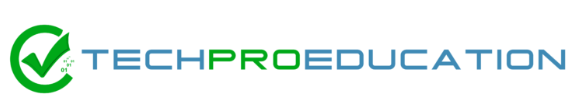

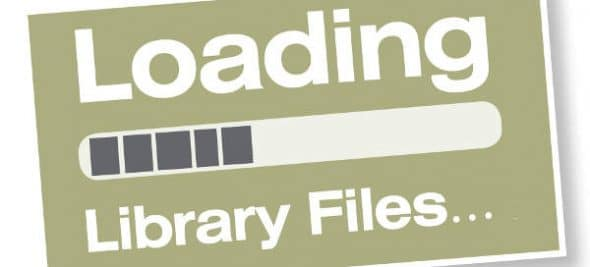

In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show") 

# Uyarı mesajlarını göstermemek için uyarı filtresi uygular. 
# Bu, kodu çalıştırdığınızda uyarı mesajlarının görünmesini engeller.


plt.rcParams["figure.figsize"] = (10,6)
# Matplotlib kütüphanesindeki grafik boyutlarını (figür boyutu) ayarlar. 
# Burada (10,6), genişliği 10 ve yüksekliği 6 birim olan bir çerçeve boyutu belirtilir.

sns.set_style("whitegrid")
# Seaborn kütüphanesindeki grid görünümünü beyaz bir arka planla ayarlar.

pd.set_option('display.float_format', lambda x: '%.3f' % x)
# pandas kütüphanesindeki float formatını ayarlar. 
# Burada lambda fonksiyonu kullanılarak, ondalık sayıların görüntülenme formatı ayarlanır.

pd.set_option('display.max_rows', None)
# veri çerçevelerindeki tüm satırların görüntülenmesini istemiyorsanız, display.max_rows seçeneğini None olarak ayarlar.

pd.set_option('display.max_columns', None)
# veri çerçevelerindeki tüm sütunların görüntülenmesini istemiyorsanız, display.max_columns seçeneğini None olarak ayarlar.


In [186]:
df = pd.read_csv("fake_reg.csv")

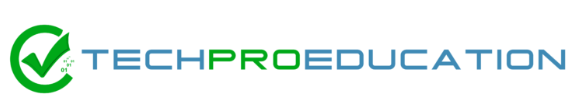

## Exploratory Data Analysis and Visualization

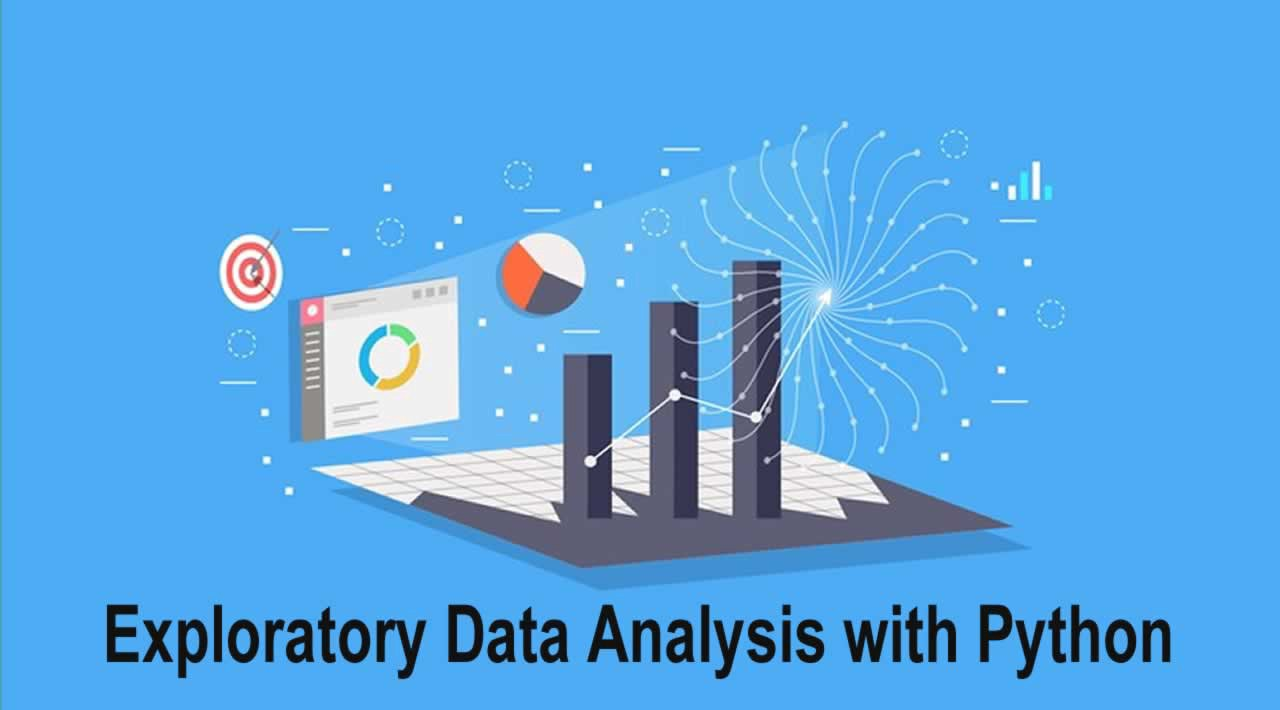

In [187]:
df.head()

price  feature1  feature2
0 461.528   999.788   999.766
1 548.130   998.862  1001.042
2 410.297  1000.070   998.844
3 540.382   999.952  1000.441
4 546.025  1000.446  1000.339

In [188]:
df.tail()

price  feature1  feature2
995 476.526  1000.019   999.673
996 457.313   998.855  1000.020
997 456.721  1001.452   998.848
998 403.316  1000.771   998.563
999 599.367   999.232  1001.451

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [190]:
df.describe()

price  feature1  feature2
count 1000.000  1000.000  1000.000
mean   498.673  1000.014   999.980
std     93.785     0.974     0.948
min    223.347   997.058   996.996
25%    433.026   999.332   999.316
50%    502.382  1000.010  1000.002
75%    564.922  1000.638  1000.645
max    774.408  1003.208  1002.666

In [191]:
df.describe().T

count     mean    std     min     25%      50%      75%      max
price    1000.000  498.673 93.785 223.347 433.026  502.382  564.922  774.408
feature1 1000.000 1000.014  0.974 997.058 999.332 1000.010 1000.638 1003.208
feature2 1000.000  999.980  0.948 996.996 999.316 1000.002 1000.645 1002.666

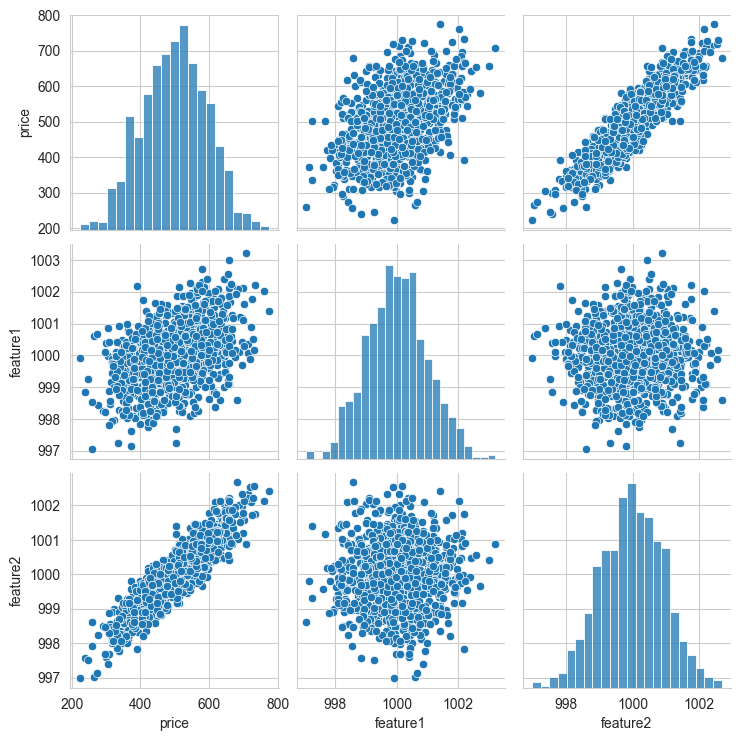

In [192]:
sns.pairplot(df);

In [193]:
df.corr()

price  feature1  feature2
price     1.000     0.444     0.908
feature1  0.444     1.000     0.031
feature2  0.908     0.031     1.000

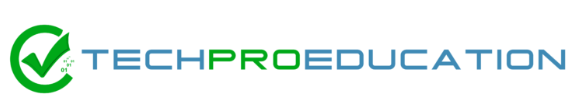

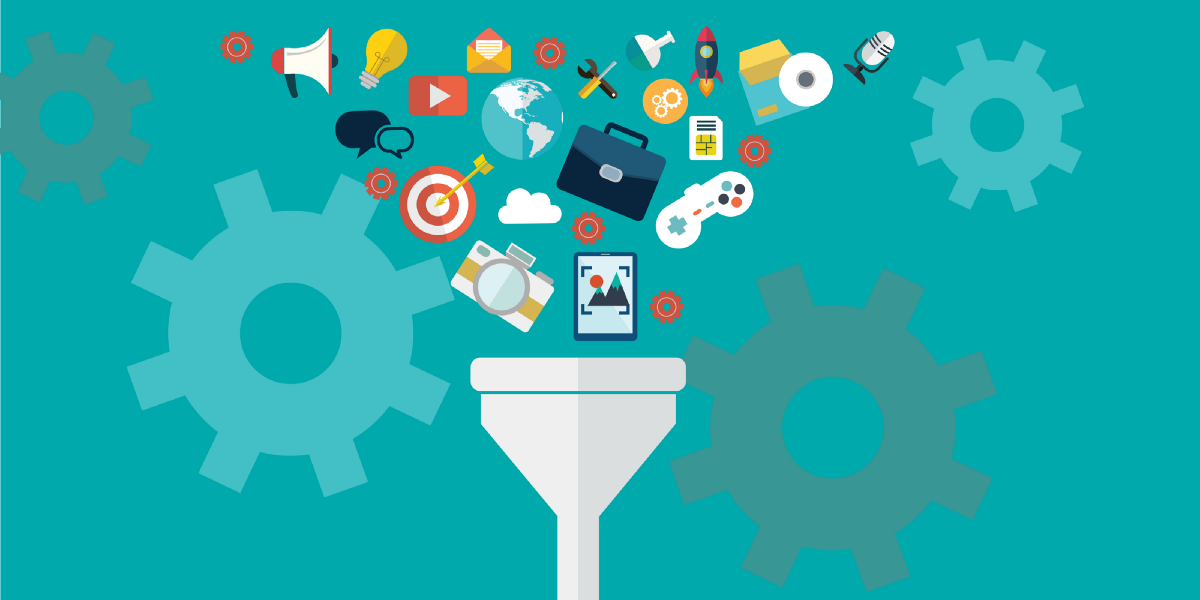

## Preprocessing of Data
- Train | Test Split, Scalling

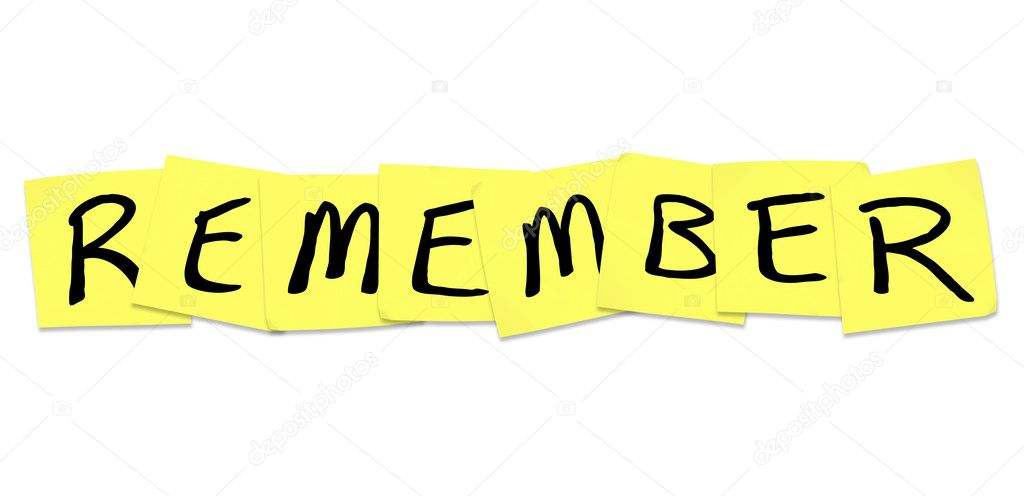

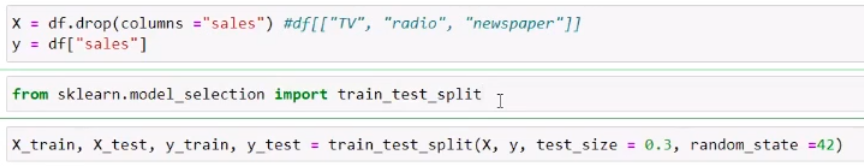

NumPy, çok boyutlu dizileri (array) yönetmek için kullanılan bir kütüphanedir. NumPy, özellikle matematiksel işlemler için optimize edilmiştir ve büyük veri kümeleriyle verimli bir şekilde çalışabilir. NumPy dizileri, bellek kullanımını en aza indirgemek için verileri sıkıştırır ve çok hızlı işlem yapmak için optimize edilmiştir.

Dataframe ise, tablo verilerini işlemek için kullanılan bir yapıdır. Pandas kütüphanesi tarafından sağlanır. DataFrame, verileri satırlar ve sütunlar halinde düzenler ve verileri etiketli olarak depolar. DataFrame, birçok veri işleme görevi için kullanışlıdır, özellikle verileri filtrelemek, sıralamak, birleştirmek, gruplamak ve birçok farklı yolla dönüştürmek için kullanılabilir.

DataFrame ve NumPy arasındaki farklar şunlardır:

DataFrame, verileri satırlar ve sütunlar halinde depolarken, NumPy dizileri sadece çok boyutlu dizileri depolar.
DataFrame, verileri etiketli olarak depolarken, NumPy dizileri, verileri sıralı olarak depolar.
DataFrame, verileri farklı tiplerde sütunlar halinde depolarken, NumPy dizileri aynı tipte verileri depolar.
Birçok veri bilimci, genellikle veri ön işleme işlemlerinde DataFrame kullanırken, model eğitimi ve tahmininde NumPy dizilerini kullanmayı tercih eder.

Makine öğrenimi modellerinin birçoğu, girdi olarak NumPy dizilerini kullanır. Bu nedenle, verileriniz bir NumPy dizisi olarak sağlandığında, daha hızlı ve verimli bir şekilde işlenebilirler.

NumPy dizileri, matematiksel işlemler yapmak için optimize edilmiştir ve bu nedenle, verilerinizi NumPy dizilerine dönüştürmek, verilerinizi işlemenin daha hızlı ve daha verimli bir yolunu sağlayabilir.

Ayrıca, NumPy dizileri, verilerinizi bellekte daha verimli bir şekilde depolamanızı sağlar. Verilerinizi bir DataFrame'de saklarsanız, DataFrame'in boyutu büyükse, bu bellek kullanımı açısından maliyetli olabilir. Ancak, NumPy dizileri daha az bellek kullanır ve bu nedenle büyük veri kümeleriyle çalışırken avantaj sağlar.

Ancak, bazı durumlarda, makine öğrenimi modelleri, girdi olarak bir NumPy dizisi gerektirir. Bu durumlarda, DataFrame'deki sütunları bir NumPy dizisine dönüştürmeniz gerekebilir.

Örneğin, yapay sinir ağları (ANN), sıklıkla girdi olarak NumPy dizileri kullanır ve bu nedenle, bir DataFrame'deki sütunları bir NumPy dizisine dönüştürmek, verileri yapay sinir ağı modeline girdi olarak verebilmek için gereklidir.

Ancak, diğer makine öğrenimi modelleri (örneğin, karar ağaçları veya destek vektör makineleri), DataFrame üzerinde doğrudan çalışabilir ve bu nedenle, verileri bir NumPy dizisine dönüştürmek zorunda kalmazsınız. Bu nedenle, yapmanız gereken şey, veri yapınıza ve kullandığınız makine öğrenimi modeline bağlıdır.

Son olarak, bazı makine öğrenimi modelleri, girdileri NumPy dizileri olarak bekler. Bu nedenle, verilerinizi NumPy dizilerine dönüştürerek, bu modelleri kullanmanızı kolaylaştırabilirsiniz.

In [194]:
from sklearn.model_selection import train_test_split

In [195]:
X = df[['feature1', 'feature2']].values  
y = df['price'].values

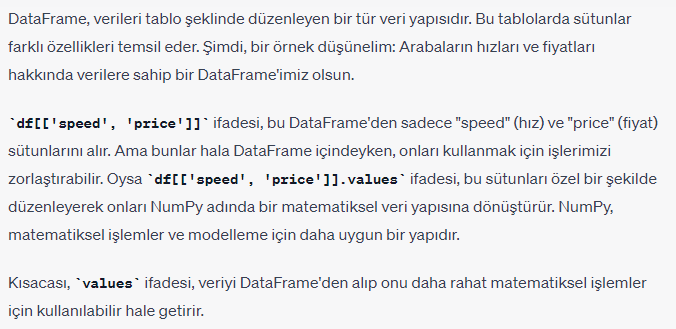

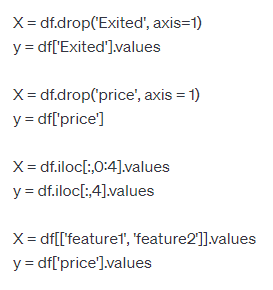

pandas DataFrame içindeki 'feature1' ve 'feature2' sütunlarını seçer ve bu sütunları bir NumPy dizisine dönüştürür.

values özelliği, DataFrame'in sadece değerlerini (yani sütun adlarını ve satır endekslerini dışarıda bırakarak) içeren bir NumPy dizisi döndürür. Bu şekilde, seçilen sütunlar NumPy dizisine dönüştürülebilir ve daha sonra bir makine öğrenimi modeli gibi NumPy dizileri ile çalışan işlevlere giriş olarak verilebilir.

In [196]:
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [197]:
y

array([461.52792939, 548.13001146, 410.29716167, 540.38221981,
       546.02455292, 542.9836716 , 555.48566416, 417.56972453,
       373.14653122, 633.35029248, 624.24709206, 475.37241721,
       600.36844486, 532.83295175, 472.8353628 , 506.31229096,
       508.414406  , 610.4553519 , 323.65776198, 446.21230389,
       362.12270299, 433.41064026, 562.00257647, 637.30962074,
       522.80800754, 469.8028243 , 543.10992778, 565.43416994,
       530.03285381, 610.58016503, 482.55641188, 327.56004052,
       579.73083872, 448.42981468, 628.97709187, 536.79737216,
       570.06729543, 357.82557519, 612.08492732, 444.67970846,
       600.1186364 , 523.53312776, 512.94994495, 614.8813169 ,
       404.35303251, 643.68851807, 488.95660398, 443.20468572,
       514.47906638, 514.88174058, 325.05852217, 554.6620585 ,
       451.39140001, 587.67887726, 477.73749721, 574.51560687,
       548.9107991 , 528.69088356, 443.21100482, 397.88209319,
       355.79535223, 460.69478138, 534.7673737 , 537.60

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [199]:
X_train.shape

(700, 2)

In [200]:
X_test.shape

(300, 2)

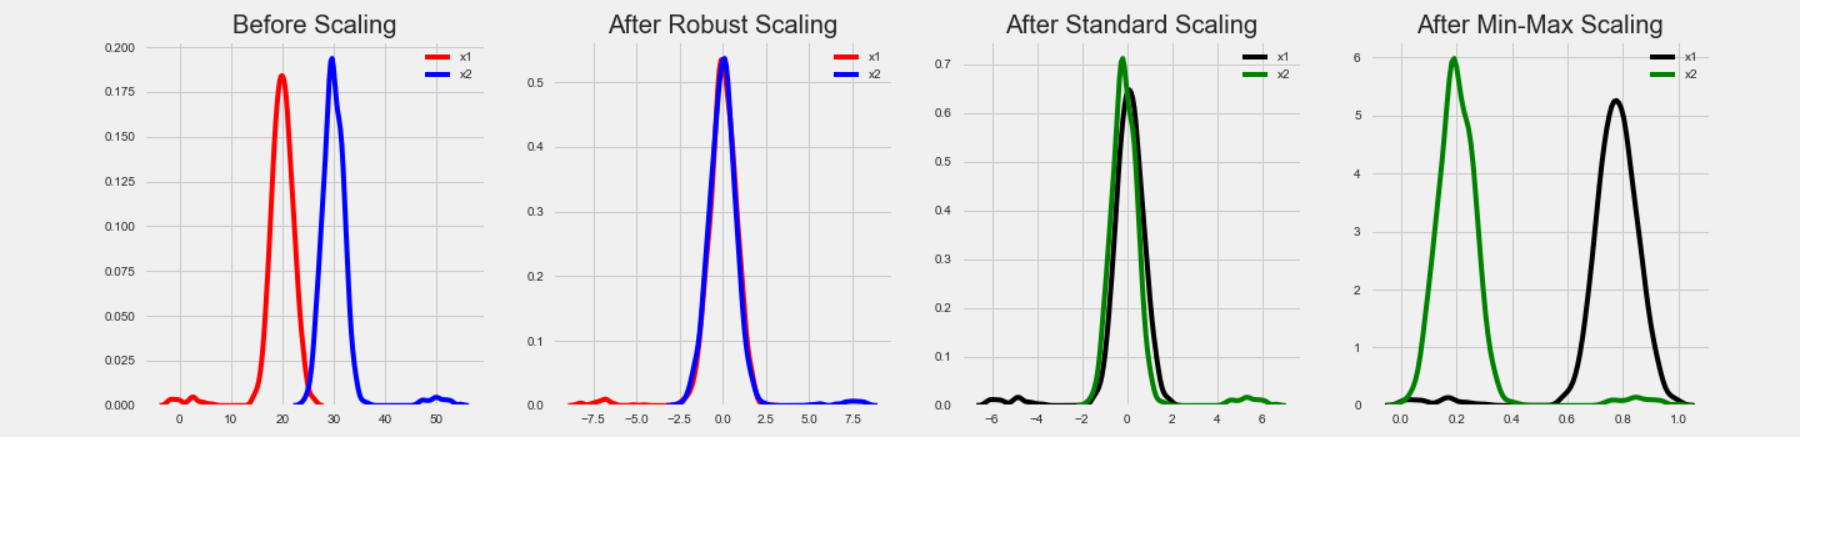

Deep Learning modellerinde, verilerin ölçeklendirilmesi ve normalleştirilmesi için çeşitli scaler yöntemleri kullanılabilir. Hangi scaler yönteminin kullanılması gerektiği, veri setinin özelliklerine, modelin yapısına ve kullanılacak optimizer algoritmasına bağlıdır. Aşağıda yaygın olarak kullanılan scaler yöntemlerini açıklamak istiyorum:

Min-Max Scaler: Bu yöntem, verileri belirli bir aralığa indirger. Verileri minimum ve maksimum değerleri arasında belirli bir aralığa ölçeklendirerek yapılır. Bu yöntem, genellikle 0 ile 1 arasında ölçeklendirme yapmak için kullanılır.

Standard Scaler: Bu yöntem, verilerin ortalamasını 0 ve standart sapmasını 1 olarak ölçeklendirir. Verilerin dağılımını merkezileştirerek yapılır. Bu yöntem, genellikle verilerin normal dağıldığı durumlarda kullanılır.

Robust Scaler: Bu yöntem, verilerin ortanca değerini 0 ve yüzdelik aralığını belirli bir aralığa indirger. Verilerin dağılımını merkezileştirerek yapılır. Bu yöntem, verilerde aykırı değerlerin olduğu durumlarda kullanılır.

MaxAbs Scaler: Bu yöntem, verilerin maksimum mutlak değerini 1 olarak ölçeklendirir. Bu yöntem, özellikle sparse matris verileri için kullanılır.

Hangi scaler yönteminin kullanılacağı, veri setinin özelliklerine ve modelin yapısına bağlıdır. Genellikle, Min-Max scaler veya Standard scaler kullanmak iyi sonuçlar verir. Ancak, farklı scaler yöntemleri farklı veri setleri ve modeller için daha iyi sonuçlar verebilir.

In [201]:
from sklearn.preprocessing import MinMaxScaler 

In [202]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base._OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : b

Yapay sinir ağı (ANN) modellerinde verilerin ölçeklendirilmesi ve normalleştirilmesi, eğitim performansını artırmak ve daha iyi sonuçlar elde etmek için önemlidir. Min-Max normalizasyonu, verileri belirli bir aralıkta ölçeklendirmek için kullanılan bir yöntemdir. Bu yöntem, verileri minimum ve maksimum değerleri arasında belirli bir aralığa indirger. Örneğin, [0,1] aralığına ölçeklendirme yapılabilir.

Min-Max normalizasyonu, verilerin her özelliği için minimum ve maksimum değerleri bulup, her özelliği bu minimum ve maksimum değer aralığında yeniden ölçeklendirerek yapılır. Bu sayede, verilerin farklı özellikleri arasındaki değer farklılıkları azalır ve daha homojen bir veri kümesi elde edilir.

Bu normalizasyon yöntemi, ANN'lerde sıklıkla kullanılır çünkü modelin verilerin arasındaki farklılıkları daha iyi anlamasına ve daha iyi sonuçlar üretmesine yardımcı olur.

In [203]:
scaler = MinMaxScaler() # Deep Learning de MinMax kullanmak daha iyidir!

In [204]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Sadece girdi verileri (X) ölçeklendirilir, çıktı verileri (y) ölçeklendirilmez. Bu nedenle, scaler.fit() fonksiyonu yalnızca X_train verilerine uygulanır ve X_train verileri ölçeklendirilir. Daha sonra, öğrenilen ölçekleme parametreleri (minimum ve maksimum değerler) kullanılarak, X_test verileri de ölçeklendirilir. Y_test ve y_train verilerinin ölçeklendirilmemesinin sebebi, bu verilerin çıktı değerleri olmasıdır ve bu değerlerin, girdi verileri gibi sayısal değerler olarak işlenmesi gerektiği için ölçeklendirme işlemine ihtiyaç duyulmaz.

X_train ve X_test olarak ikiye ayırıyor ve ardından scaler.fit() yöntemiyle eğitiyor. Daha sonra X_train ve X_test veri kümelerini scaler.transform() yöntemiyle ölçeklendiriyor. Bu, verilerin özelliklerinin aynı ölçekte olmasını sağlayarak daha iyi bir performans elde etmek için yapılan bir ön işlemdir.

In [205]:
X_train.max()

1.0

In [206]:
X_train.min()

0.0

In [207]:
X_test.max()   #train datasında scaler yaptığımızdan 0 ile 1 arasında değerler gelir  fakat test datasında 1 den büyük 0 dan küçük değerler olabilir

1.0186515935232023

In [208]:
X_test.min()

-0.014108392024525074

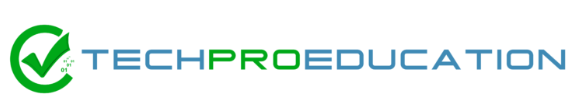

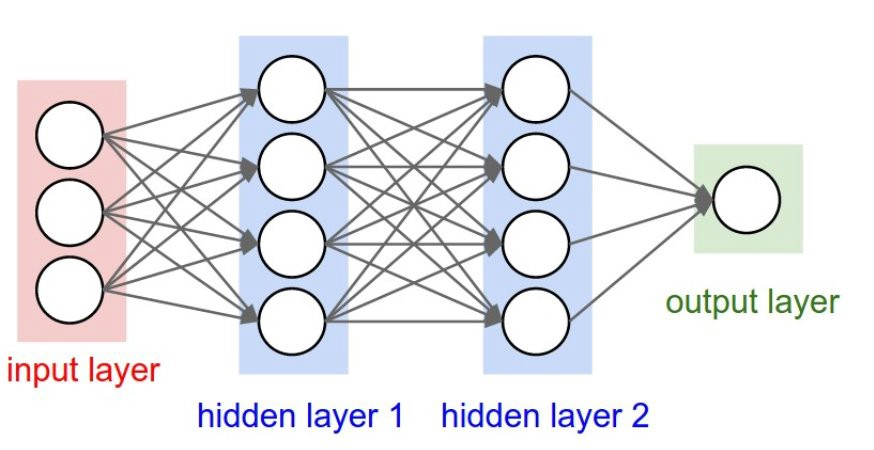

## Modelling

In [209]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [210]:
import tensorflow as tf

In [211]:
from keras import models

In [212]:
from tensorflow.keras.layers import Dense, Activation

In [213]:
from tensorflow.keras.models import Sequential


In [214]:
help(Sequential) # arka arka katman oluşturmamı sağlayan yapıdır. ilk olarak modeli squental olarak tanımlarız.

Help on class Sequential in module keras.engine.sequential:

class Sequential(keras.engine.functional.Functional)
 |  Sequential(layers=None, name=None)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(tf.keras.layers.Dense(4))
 |  
 |  # This is identical to the following:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.Input(shape=(16,)))
 |  model.add(tf.keras.layers.Dense(8))
 |  
 |  # Note that you can also omit the `input_shape` argument.
 |  # In that case the model doesn't have any weights until the first call
 |  # to a training/evaluation method (since it isn't yet built):
 |  model = tf.keras.Se

In [215]:
help(Dense) # katman (layer) cinsi ANN'de en temal katman Dense'dir. fullyhelp(Dense) # katman (layer) cinsi ANN'de en temal katman Dense'dir. fulyconnected layer oluşturmak için Dense kulanılır.

Help on class Dense in module keras.layers.core.dense:

class Dense(keras.engine.base_layer.Layer)
 |  Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`). These are all attributes of
 |  `Dense`.
 |  
 |  Note: If the input to the layer has a rank greater than 2, then `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 0 of the `kern

Sequential sınıfı, bir modelin katmanlarını birbirine sırayla eklemek için kullanılan bir sınıftır. Bu şekilde, her katmanın çıkışı, bir sonraki katmanın girdisi olarak kullanılabilir. Bu da model oluşturmayı kolaylaştırır.

Dense ise, tam bağlı bir katman oluşturmak için kullanılan bir sınıftır. Tam bağlı katmanlar, önceki katmanın tüm çıktılarının sonraki katmana girdi olarak aktarıldığı katmanlardır.

Yani Sequential sınıfı, bir modelin katmanlarını sırayla eklemek için kullanılırken, Dense sınıfı, bir tam bağlı katman oluşturmak için kullanılır. Sequential sınıfında, her katman Dense sınıfı ile oluşturulabilir.

In [216]:
# First way to create model

model = Sequential([Dense(units = 4, input_dim=2, activation = "relu"),   # her bir dense bir layer'i  tanımlar 
                    Dense(units = 4, activation = "relu"),   # units kaç nöron olduğunu söyler fonksiyonuda Relu
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 1)]) #output layer

input_dim, bir sinir ağı modelinin ilk katmanında kaç tane girdi değişkeni (input) olduğunu belirtmek için kullanılan bir parametredir. Bu, modelin ilk katmanına hangi boyutlu bir veri gireceğimizi belirler. Örneğin, eğer bir veri setinde her veri 100 özellikten oluşuyorsa, sinir ağı modelinin ilk katmanının input_dim parametresi 100 olarak belirlenir.

input_dim parametresinin doğru bir şekilde belirlenmesi, sinir ağı modelinin düzgün bir şekilde çalışmasına yardımcı olur. Eğer input_dim yanlış belirlenirse, sinir ağı modeli düzgün bir şekilde eğitilemez veya modelin performansı düşük olabilir.

bu model için girdi boyutu (input dimension) 2'dir. Eğer input_dim'i 100 yaparsak, modelin ilk katmanının 100 nörona sahip olacağını düşünürüz. Ancak veri setimizin boyutu hala 2 olduğu için, 100 nöronlu bir katman kullanmak gereksiz olurdu ve ayrıca ağın öğrenme kapasitesini arttırmak yerine aşırı öğrenmeye yol açabilir. Bu nedenle, veri setinin boyutuna uygun bir input_dim seçmeliyiz.

input_dim parametresini kaldırmak, modelin ilk katmanına verilecek özellik boyutunu belirtmediği anlamına gelir. Bu durumda, model eğitilirken kullanılan verinin özellik boyutuna bağlı olarak otomatik olarak belirlenecektir.

Bu durumda, eğitim veri setindeki özelliklerin boyutu otomatik olarak belirlenecektir. Bu, modelin esnekliğini bir ölçüde artırabilir, ancak bazı durumlarda, özellik boyutu sabit olarak belirlenmesi ve modelin bu boyuta göre optimize edilmesi daha iyi sonuçlar verebilir.

Dolayısıyla, input_dim parametresini kaldırmak, modelin daha fazla esnekliğe sahip olmasına neden olabilir, ancak hangi seçeneğin daha iyi olduğunu belirlemek için modelin eğitilmesi ve performansının değerlendirilmesi gerekmektedir.

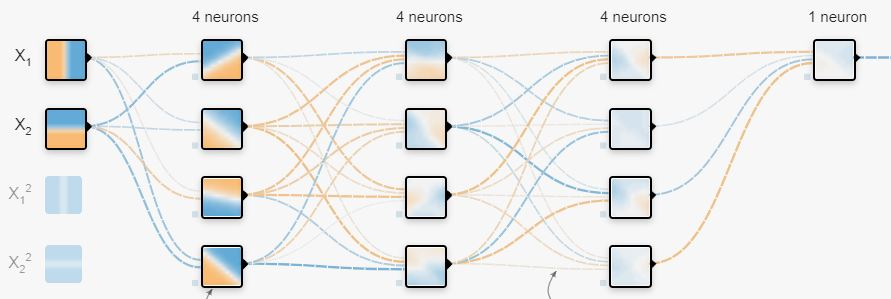

In [217]:
# Second way to create model (recommended)

model = Sequential()
model.add(Dense(units = 4, input_dim = X_train.shape[1], activation = "relu"))     
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 1)) # regression problemi olduğu için 1 output var. 

X_train veri kümesinin sütun sayısı, yani özellik sayısı input_dim değişkenine atanıyor. Yani modele giren her bir veri örneği, input_dim boyutunda bir vektör olacak. Bu sayede model, girdi olarak beklenen boyutta bir vektör aldığını biliyor ve bu boyuttaki vektörler üzerinden işlem yaparak çıktı üretiyor. X_train.shape[1] ifadesi, X_train veri kümesinin boyutunu (n_samples, n_features) şeklinde veren bir NumPy dizisi döndürür. Burada n_features özellik sayısını temsil eder ve X_train.shape[1] ifadesi bu değere eşittir.

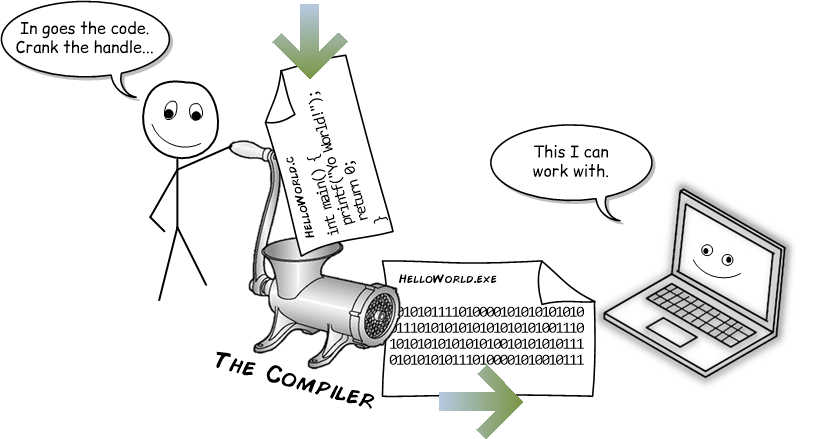

In [218]:
model = Sequential()
model.add(Dense(units = 4, activation = "relu"))     
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 1)) # regression problemi olduğu için 1 output var. 

In [219]:
model.compile(optimizer="rmsprop", loss="mse")

#model kuruldu bu model nasıl çalışacak onu burada belirleriz
#optimizer mincost bulur geriye doğru optimize eder. rmsprop veya adam kullanılabilir
# loss loss function regression probleminde genelde mse kullanılır 

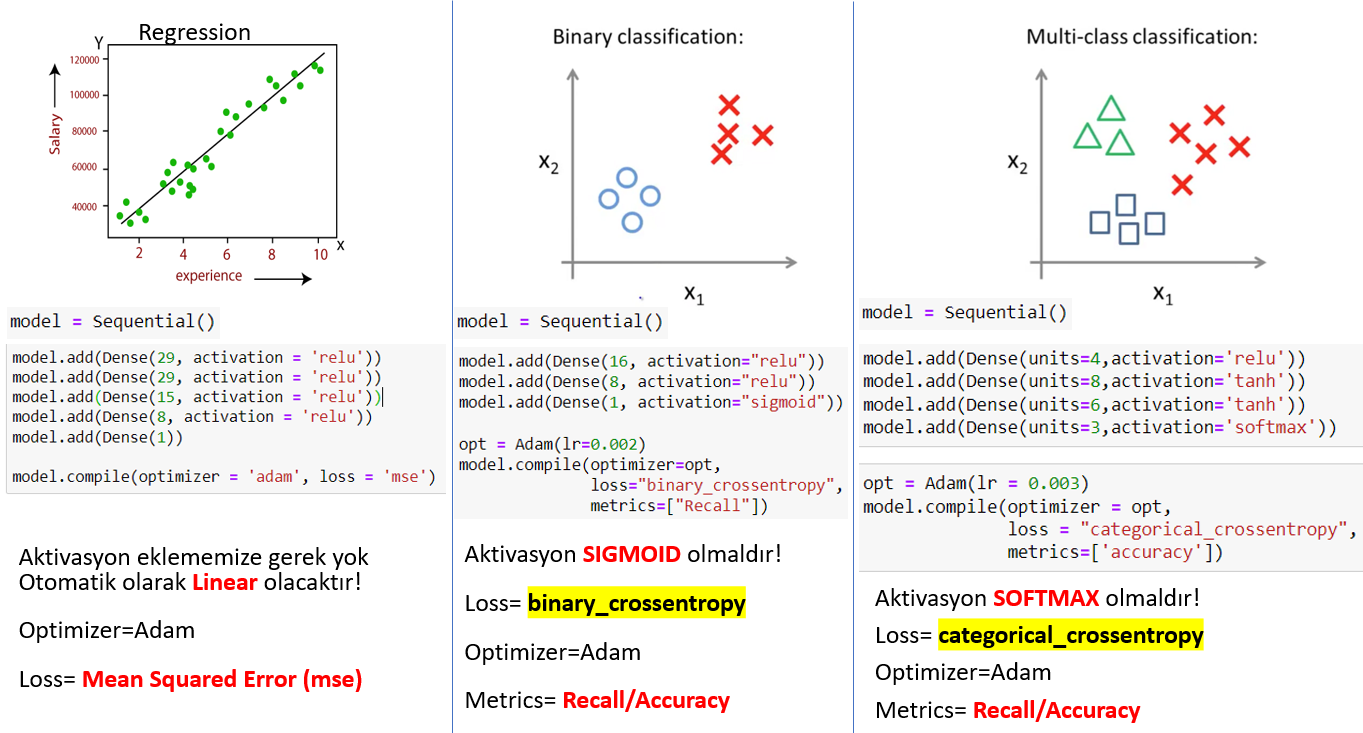

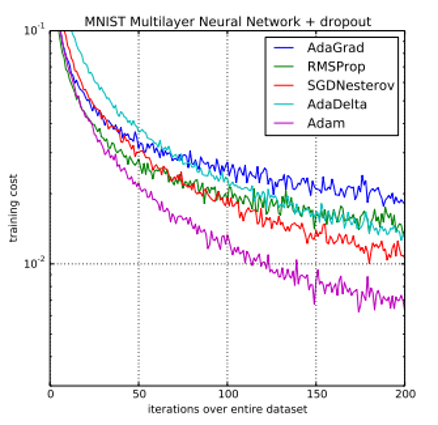

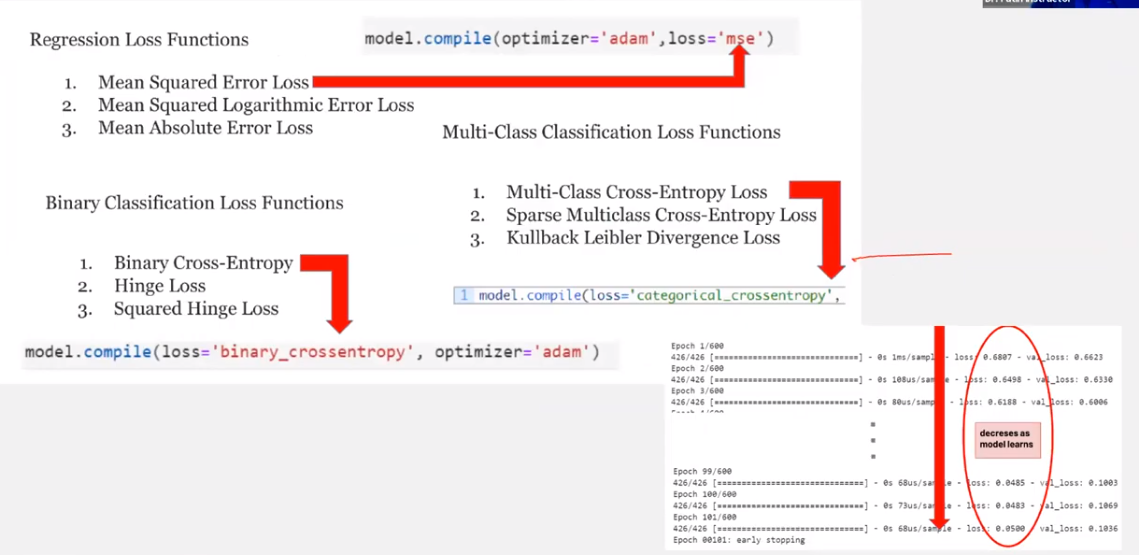

ölçeklendirilmiş X_train verileri, modelin fit() yöntemi aracılığıyla eğitilir. y_train ise hedef değişkenidir ve modelin öğrenmesi gereken çıktılardır. 

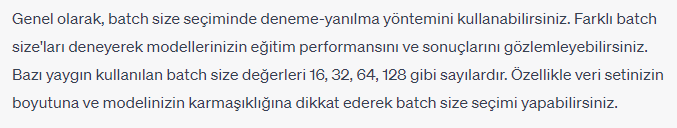

In [220]:
model.fit(x = X_train, y = y_train, batch_size = 32, epochs = 1) 

22/22 [==============================] - 11s 3ms/step - loss: 256607.9531


In [221]:
model.weights 

[<tf.Variable 'dense_52/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[ 0.4025159 , -0.4057828 ,  0.62197435,  0.6520454 ],
        [-0.5310192 ,  0.84035397, -0.81048656, -0.8360691 ]],
       dtype=float32)>,
 <tf.Variable 'dense_52/bias:0' shape=(4,) dtype=float32, numpy=array([-0.02458817,  0.03447269,  0.03135237, -0.02183152], dtype=float32)>,
 <tf.Variable 'dense_53/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 0.3581143 ,  0.4472233 ,  0.6518217 ,  0.63926786],
        [ 0.6744742 ,  0.15657409,  0.00446204, -0.62831414],
        [ 0.8940264 , -0.32414657, -0.14995684, -0.5458342 ],
        [ 0.47390896, -0.33968344,  0.34179503, -0.75240463]],
       dtype=float32)>,
 <tf.Variable 'dense_53/bias:0' shape=(4,) dtype=float32, numpy=array([ 0.03527568,  0.03128978, -0.01562   ,  0.        ], dtype=float32)>,
 <tf.Variable 'dense_54/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-0.62335473,  0.5493273 ,  0.7591234 ,  0.6353002 ],
        [-0.28336388, -0.22

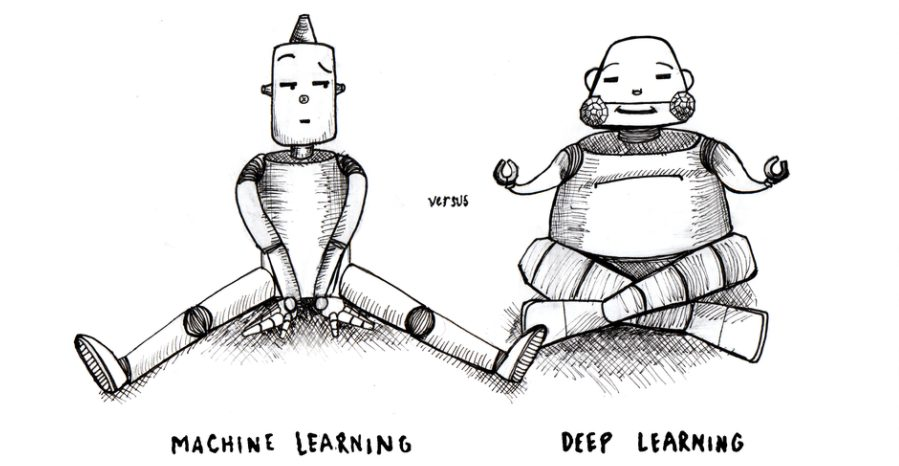

In [222]:
model.fit(x = X_train, y = y_train, batch_size = 32, epochs = 300) #300 defa tüm datayı modele sokacak her iterasyonda 32 satır kullandı (batch_size 32) 32 satırın ortalama hata değerini Gradientdecent ile parametreleri backpropogation ile güncelledi bir somraki epoc bu değerler üzerinden train edilecek bütün epoc lar bitene  kadar devam edecek 
#loss değeri  o epoc un en sonuncu değerini verir 
# batch_size için tek tek verilebilir hızlı olur ama doğruluk oranı azalır, yüksek verirsek süre uzar doğruluk oranı artar.datanın tamamı olursa çok yavaş olur fakat çok doğru sonuçlar alınır.
# datanın büyüklüğü ve süreye göre ayarlanır.

Epoch 1/300
22/22 [==============================] - 6s 2ms/step - loss: 256441.6875
Epoch 2/300
22/22 [==============================] - 0s 2ms/step - loss: 256261.0781
Epoch 3/300
22/22 [==============================] - 0s 2ms/step - loss: 256043.7656
Epoch 4/300
22/22 [==============================] - 0s 2ms/step - loss: 255783.8125
Epoch 5/300
22/22 [==============================] - 0s 2ms/step - loss: 255470.2812
Epoch 6/300
22/22 [==============================] - 0s 2ms/step - loss: 255096.4844
Epoch 7/300
22/22 [==============================] - 0s 2ms/step - loss: 254660.4062
Epoch 8/300
22/22 [==============================] - 0s 2ms/step - loss: 254162.0156
Epoch 9/300
22/22 [==============================] - 0s 2ms/step - loss: 253591.2969
Epoch 10/300
22/22 [==============================] - 0s 2ms/step - loss: 252949.4844
Epoch 11/300
22/22 [==============================] - 0s 2ms/step - loss: 252227.2188
Epoch 12/300
22/22 [==============================] - 0s 2ms/st

22/22 [==============================] - 0s 2ms/step - loss: 24.3741
Epoch 196/300
22/22 [==============================] - 0s 2ms/step - loss: 24.3209
Epoch 197/300
22/22 [==============================] - 0s 2ms/step - loss: 24.6464
Epoch 198/300
22/22 [==============================] - 0s 2ms/step - loss: 24.6296
Epoch 199/300
22/22 [==============================] - 0s 2ms/step - loss: 24.0162
Epoch 200/300
22/22 [==============================] - 0s 2ms/step - loss: 25.0453
Epoch 201/300
22/22 [==============================] - 0s 2ms/step - loss: 24.3765
Epoch 202/300
22/22 [==============================] - 0s 2ms/step - loss: 23.9717
Epoch 203/300
22/22 [==============================] - 0s 2ms/step - loss: 24.7320
Epoch 204/300
22/22 [==============================] - 0s 2ms/step - loss: 24.8994
Epoch 205/300
22/22 [==============================] - 0s 2ms/step - loss: 24.4039
Epoch 206/300
22/22 [==============================] - 0s 2ms/step - loss: 24.7126
Epoch 207/300
22/2

bir epoch tamamlandığında, tüm batch'lerin loss değerlerinin ortalaması, epoch loss değerini oluşturur. 

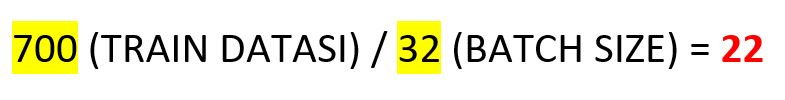

Iterasyon sayısı, veri kümesindeki örnek sayısının batch boyutuna bölünmesiyle hesaplanabilir. Bu durumda:

700 veri örneği ve 32'lik batch boyutu olduğu için iterasyon sayısı şu şekilde hesaplanır:

700 / 32 = 21.875

Batch boyutu tam sayı olması gerektiğinden, son iterasyonda kalan örnekler için ek bir iterasyon yapılır. Yani toplam iterasyon sayısı 22 olacaktır.

In [223]:
model.summary() # her katmanda kaç parametre olduğunu verir 

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 4)                 12        
                                                                 
 dense_53 (Dense)            (None, 4)                 20        
                                                                 
 dense_54 (Dense)            (None, 4)                 20        
                                                                 
 dense_55 (Dense)            (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


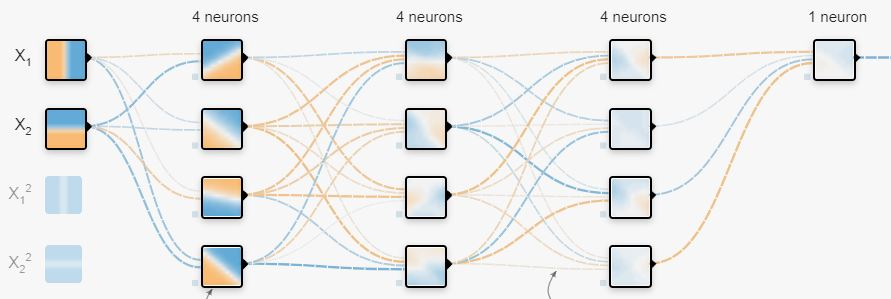

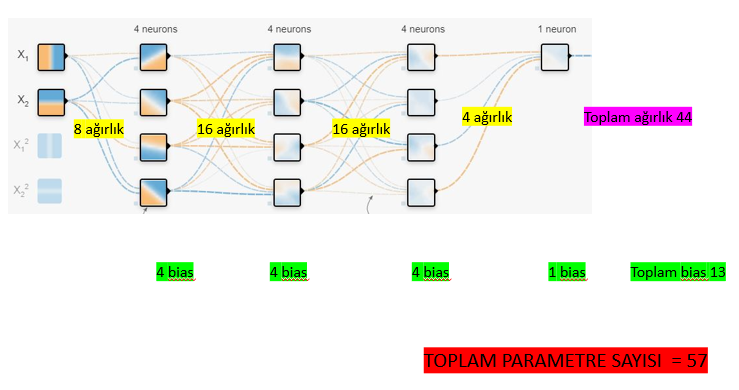

"model.weights" ifadesi, eğitim sonucu elde edilen ağırlıkları içerir. İlk verilen ağırlıkların (genellikle rastgele atanan ağırlıkların) saklanması için ayrı bir işlev kullanmanız gerekir.

Bir ANN modeli oluşturduğunuzda, başlangıçta modeldeki ağırlıklar genellikle rastgele atanır. Bu rastgele atanan ağırlıklar, modelin giriş verilerini kullanarak tahminler yapmasını sağlar. Ancak, tahminlerin çoğu zaman yanlış olacağından, model eğitim verileriyle beslenir ve eğitim sırasında ağırlıklar yavaş yavaş ayarlanarak daha iyi tahminler yapması sağlanır. Eğitim bittiğinde, modelin son ağırlıkları, eğitim verilerine en iyi uyacak şekilde ayarlanmış olan ağırlıklardır.

Bu nedenle, "model.weights" ifadesi, eğitim sürecinde modelin öğrendiği ağırlıkları içerir. İlk verilen rastgele ağırlıkları elde etmek isterseniz, "model.get_weights()" işlevini kullanabilirsiniz.

Keras'ta, bir modelin ağırlıklarına erişmek için get_weights() yöntemini kullanabilirsiniz. Bu yöntem, bir numpy dizisi olarak ağırlıkların ve biasların bir listesini döndürür. Eğitim öncesi ağırlıkların elde edilmesi için, model eğitilmeden önce get_weights() yöntemi çağrılabilir ve ağırlıklar kaydedilebilir. Bu ağırlıklar daha sonra eğitim sonrası ağırlıklarla karşılaştırılabilir. Alternatif olarak, modelin ağırlıklarını kaydetmek için save_weights() yöntemi kullanılabilir ve eğitim öncesi ağırlıkların kaydedilmiş bir sürümü yine load_weights() yöntemi ile geri yüklenebilir.

In [224]:
model.weights #eğitim sonrası ağırlık değerleri

[<tf.Variable 'dense_52/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[1.5625722, 0.757061 , 1.7954439, 1.7475969],
        [2.4584606, 3.8254063, 2.189631 , 2.0920134]], dtype=float32)>,
 <tf.Variable 'dense_52/bias:0' shape=(4,) dtype=float32, numpy=array([0.6029629, 0.6605689, 0.6709807, 0.5419706], dtype=float32)>,
 <tf.Variable 'dense_53/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 2.0916264 ,  2.1808543 ,  0.46343496,  0.63926786],
        [ 2.8376224 ,  2.3091226 , -0.6065647 , -0.62831414],
        [ 2.4841628 ,  1.2637341 , -0.19811843, -0.5458342 ],
        [ 2.0631385 ,  1.2509495 ,  0.2839017 , -0.75240463]],
       dtype=float32)>,
 <tf.Variable 'dense_53/bias:0' shape=(4,) dtype=float32, numpy=array([0.6558388 , 0.64080065, 0.86007047, 0.        ], dtype=float32)>,
 <tf.Variable 'dense_54/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-0.62335473,  2.2914772 ,  0.45169917,  2.379117  ],
        [-0.28336388,  1.539657  , -0.95802367,  1.9694278 ],


In [225]:
model.history.history # model eğitilirken çıkan loss değerlerini verir

{'loss': [256441.6875,
  256261.078125,
  256043.765625,
  255783.8125,
  255470.28125,
  255096.484375,
  254660.40625,
  254162.015625,
  253591.296875,
  252949.484375,
  252227.21875,
  251430.21875,
  250553.9375,
  249601.03125,
  248564.4375,
  247421.53125,
  246173.171875,
  244821.625,
  243350.78125,
  241755.9375,
  240040.140625,
  238190.3125,
  236204.453125,
  234058.171875,
  231780.390625,
  229350.96875,
  226754.53125,
  223991.46875,
  221070.859375,
  217980.046875,
  214684.65625,
  211213.21875,
  207609.71875,
  203783.015625,
  199760.578125,
  195571.0625,
  191181.9375,
  186589.6875,
  181796.65625,
  176840.6875,
  171678.75,
  166342.015625,
  160826.578125,
  155146.375,
  149266.53125,
  143288.015625,
  137137.171875,
  130828.171875,
  124416.0078125,
  117861.5390625,
  111212.7578125,
  104491.28125,
  97748.203125,
  90958.8984375,
  84132.59375,
  77323.5078125,
  70584.96875,
  63910.3671875,
  57366.87890625,
  50981.5546875,
  44803.09375,
  38

model.history.history özelliği, modelin eğitim işlemi sırasında kaydedilen tüm değerleri içeren bir dictionary'dir. Bu değerler, eğitim sırasında kaydedilen loss ve accuracy (veya başka bir metrik) değerlerini içerir. Bu dictionary, eğitim sırasında kaydedilen her epoch için bir girdiye sahiptir.

pd.DataFrame(model.history.history) kodu, bu dictionary'i Pandas DataFrame formatında gösterir. Bu kodu çalıştırarak, eğitim sırasında kaydedilen her epoch için loss ve accuracy değerlerini daha düzenli ve okunaklı bir şekilde görebilirsiniz. Her bir epoch'un değerleri, DataFrame'deki her bir satırda görüntülenir.

In [226]:
pd.DataFrame(model.history.history)

loss
0   256441.688
1   256261.078
2   256043.766
3   255783.812
4   255470.281
5   255096.484
6   254660.406
7   254162.016
8   253591.297
9   252949.484
10  252227.219
11  251430.219
12  250553.938
13  249601.031
14  248564.438
15  247421.531
16  246173.172
17  244821.625
18  243350.781
19  241755.938
20  240040.141
21  238190.312
22  236204.453
23  234058.172
24  231780.391
25  229350.969
26  226754.531
27  223991.469
28  221070.859
29  217980.047
30  214684.656
31  211213.219
32  207609.719
33  203783.016
34  199760.578
35  195571.062
36  191181.938
37  186589.688
38  181796.656
39  176840.688
40  171678.750
41  166342.016
42  160826.578
43  155146.375
44  149266.531
45  143288.016
46  137137.172
47  130828.172
48  124416.008
49  117861.539
50  111212.758
51  104491.281
52   97748.203
53   90958.898
54   84132.594
55   77323.508
56   70584.969
57   63910.367
58   57366.879
59   50981.555
60   44803.094
61   38832.512
62   33159.570
63   27782.498
64   22804.773
65   18264.250
66   14269.905
67   10791.052
68    7883.199
69    5634.900
70    4066.036
71    3152.870
72    2792.026
73    2704.473
74    2654.489
75    2605.808
76    2552.866
77    2502.744
78    2454.130
79    2407.182
80    2355.996
81    2311.797
82    2264.977
83    2219.480
84    2174.073
85    2123.522
86    2076.708
87    2031.097
88    1983.402
89    1940.316
90    1889.536
91    1848.127
92    1801.293
93    1756.842
94    1715.833
95    1672.597
96    1630.191
97    1584.866
98    1550.248
99    1518.471
100   1478.667
101   1437.932
102   1394.762
103   1355.938
104   1315.123
105   1275.677
106   1239.750
107   1206.085
108   1168.461
109   1132.444
110   1096.797
111   1057.669
112   1029.792
113    994.189
114    963.845
115    931.900
116    896.180
117    863.872
118    834.987
119    805.779
120    774.373
121    747.220
122    721.001
123    691.272
124    662.255
125    634.073
126    601.797
127    575.553
128    551.486
129    527.228
130    499.407
131    475.646
132    449.711
133    426.229
134    398.591
135    377.253
136    354.474
137    336.186
138    312.895
139    295.477
140    273.799
141    260.183
142    242.648
143    225.390
144    208.287
145    194.824
146    181.604
147    167.361
148    153.468
149    140.941
150    128.928
151    117.756
152    106.282
153     96.214
154     87.845
155     78.882
156     71.589
157     65.074
158     59.218
159     54.738
160     50.681
161     46.468
162     43.188
163     40.145
164     37.183
165     35.095
166     33.040
167     31.259
168     30.204
169     29.401
170     27.950
171     27.939
172     27.026
173     26.277
174     26.360
175     25.403
176     25.798
177     25.445
178     25.198
179     24.330
180     25.023
181     24.665
182     24.769
183     24.826
184     25.001
185     24.156
186     24.549
187     24.719
188     24.360
189     24.403
190     24.162
191     24.599
192     24.285
193     24.942
194     24.374
195     24.321
196     24.646
197     24.630
198     24.016
199     25.045
200     24.376
201     23.972
202     24.732
203     24.899
204     24.404
205     24.713
206     23.878
207     24.425
208     24.655
209     24.376
210     24.647
211     24.660
212     24.885
213     24.284
214     24.269
215     24.449
216     24.319
217     24.855
218     24.697
219     24.756
220     24.492
221     24.807
222     24.259
223     24.021
224     24.509
225     24.477
226     24.516
227     24.691
228     23.998
229     24.283
230     24.139
231     24.244
232     24.039
233     24.660
234     24.512
235     24.532
236     24.594
237     24.447
238     24.723
239     24.373
240     24.628
241     24.094
242     24.467
243     24.470
244     24.419
245     24.429
246     24.367
247     24.062
248     24.679
249     24.379
250     24.396
251     24.505
252     24.512
253     24.431
254     24.302
255     24.330
256     24.171
257     24.756
258     24.423
259     24.557
260     24.817
261     24.552
262     24.357
263     24.835
264     24.400
265     24.199
266  

<Axes: >

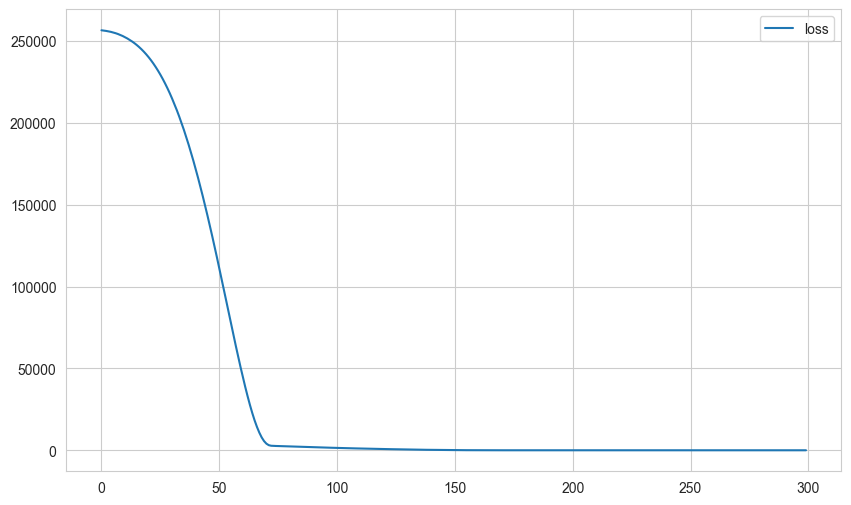

In [227]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [228]:
fig, ax= plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0, 250]) # focusing on the given x values
ax.set_ylim([0, 3000]) # focusing on the given y values

(0.0, 3000.0)

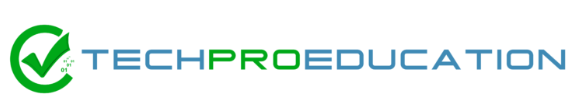

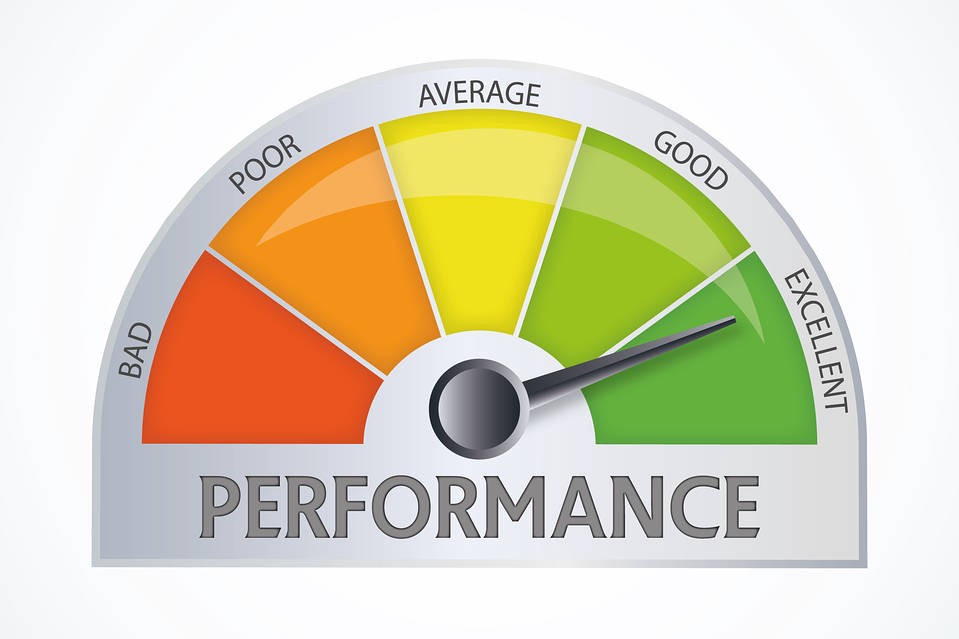

## Model Performance

In [229]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

In [230]:
model.evaluate(X_train, y_train, verbose=0) # model oluştururken loss'a hangi skoru verdiysem onun sonucunu verir. "mse"
# arka planda x ve y testi predict alıp sonra evaluate sonucunu veriyor

24.075437545776367

model.evaluate(X_test, y_test, verbose=0) kodu, eğitilen modelin test verileri üzerinde performansını değerlendirmek için kullanılır. Bu yöntem, test verileri üzerinde modelin loss değerini hesaplar.

In [231]:
model.evaluate(X_test, y_test, verbose=0)

26.001035690307617

In [232]:
model.evaluate(X_test, y_test, verbose=2)

10/10 - 2s - loss: 26.0010 - 2s/epoch - 208ms/step


26.001035690307617

In [233]:
y_pred = model.predict(X_test)

In [234]:
explained_variance_score(y_test, y_pred) # R2 skorunu verir 1 e yakınsa iyidir

0.9971552716253168

Bu kod bloğu, bir makine öğrenmesi modelinin test verileri üzerindeki tahminlerinin doğruluğunu ölçmek için kullanılan bir metrik olan "explained variance score" (açıklanan varyans skoru) hesaplamak için kullanılır.

İlk satır, "model.predict(X_test)" kullanarak, X_test veri kümesindeki özelliklere dayanarak modelin y_test verileri için tahminlerini oluşturur. Tahminler, y_pred değişkeninde saklanır.

İkinci satır, "explained_variance_score" fonksiyonunu kullanarak gerçek y_test verileri ve tahmin edilen y_pred verileri arasındaki farkı hesaplar. Bu skor, gerçek verilerin değişkenliğini ne kadar iyi açıkladığını gösterir. Skor 0 ile 1 arasında bir değer alabilir ve ne kadar yüksek olursa, modelin tahminleri gerçek verilere o kadar yakındır.

In [235]:
my_dict = {"Actual" : y_test, "Pred" : y_pred.reshape(-1,)}
compare = pd.DataFrame(my_dict)
compare.sample(10)

# gerçek ve tahmin değerlerini kıyaslarız
#büyük datalarda  milyonluk datalarda DL modeller tercih edilir 

Actual    Pred
165 343.735 345.079
277 568.605 569.464
79  633.451 641.991
59  484.462 485.583
76  497.723 508.153
65  593.475 587.505
266 442.934 449.090
74  453.458 454.542
160 604.573 605.740
64  698.410 702.498

Bu kod bloğu, test setindeki gerçek ve tahmin edilen değerleri karşılaştırmak için kullanılır.

İlk satır, "my_dict" adlı bir sözlük oluşturur. Bu sözlük, iki anahtar değerine sahiptir: "Actual" ve "Pred". "Actual" anahtarının değeri, y_test adlı gerçek hedef değişkeninin tamamını içerirken, "Pred" anahtarının değeri, modelin tahminleri olan y_pred değişkenini bir boyutlu dizi olarak içerir. "reshape(-1,)" kullanarak y_pred dizisini bir boyut küçültür ve bir dizi haline getirir.

İkinci satır, "compare" adlı bir DataFrame oluşturur. Bu DataFrame, "Actual" ve "Pred" sütunlarını içerir ve bunların değerleri, sözlükten alınır. "sample(10)" metodu, DataFrame'den rastgele 10 örnek alarak ve bu örnekleri ekranda göstererek karşılaştırma işlemini görselleştirir.

Bu kod bloğu, gerçek ve tahmin edilen değerler arasındaki farkları gösteren bir tablo oluşturur ve bu tablo, modelin performansını değerlendirmeye yardımcı olur.

<Axes: xlabel='Actual', ylabel='Pred'>

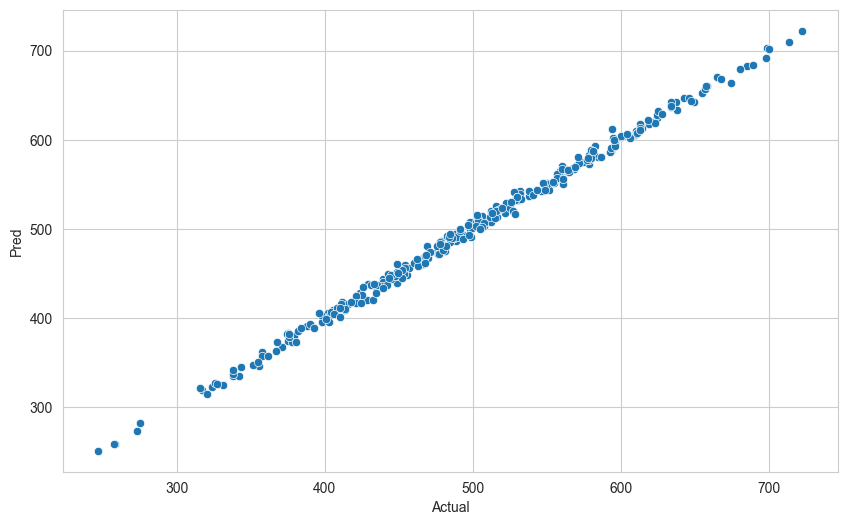

In [236]:
sns.scatterplot(x = 'Actual', y = 'Pred', data = compare)

Bu kod bloğu, "compare" DataFrame'inin "Actual" ve "Pred" sütunlarındaki verileri kullanarak, gerçek değerler ile tahmin edilen değerler arasındaki ilişkiyi görselleştirmek için seaborn kütüphanesindeki "scatterplot" fonksiyonunu kullanır.

"scatterplot" fonksiyonu, x ve y eksenlerindeki değişkenleri belirterek bir saçılım grafiği çizer. "x" parametresi, "Actual" sütunundan alınan gerçek değerleri, "y" parametresi ise "Pred" sütunundan alınan tahmin edilen değerleri temsil eder. "data" parametresi, verilerin bulunduğu DataFrame'i belirtir.

Bu kod bloğu, gerçek ve tahmin edilen değerler arasındaki ilişkiyi gösteren bir saçılım grafiği oluşturur. Eğer model doğru tahminler yapmışsa, saçılım grafiğindeki noktaların bir çizgiye yakın bir şekilde yerleşeceği beklenir.

In [237]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [238]:
eval_metric(y_test, y_pred)

r2_score: 0.9970426583869595 
mae: 4.123482891724266 
mse: 26.001041107295094 
rmse: 5.099121601540317


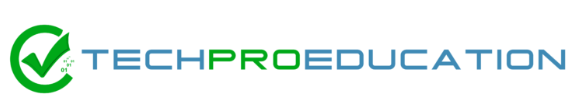

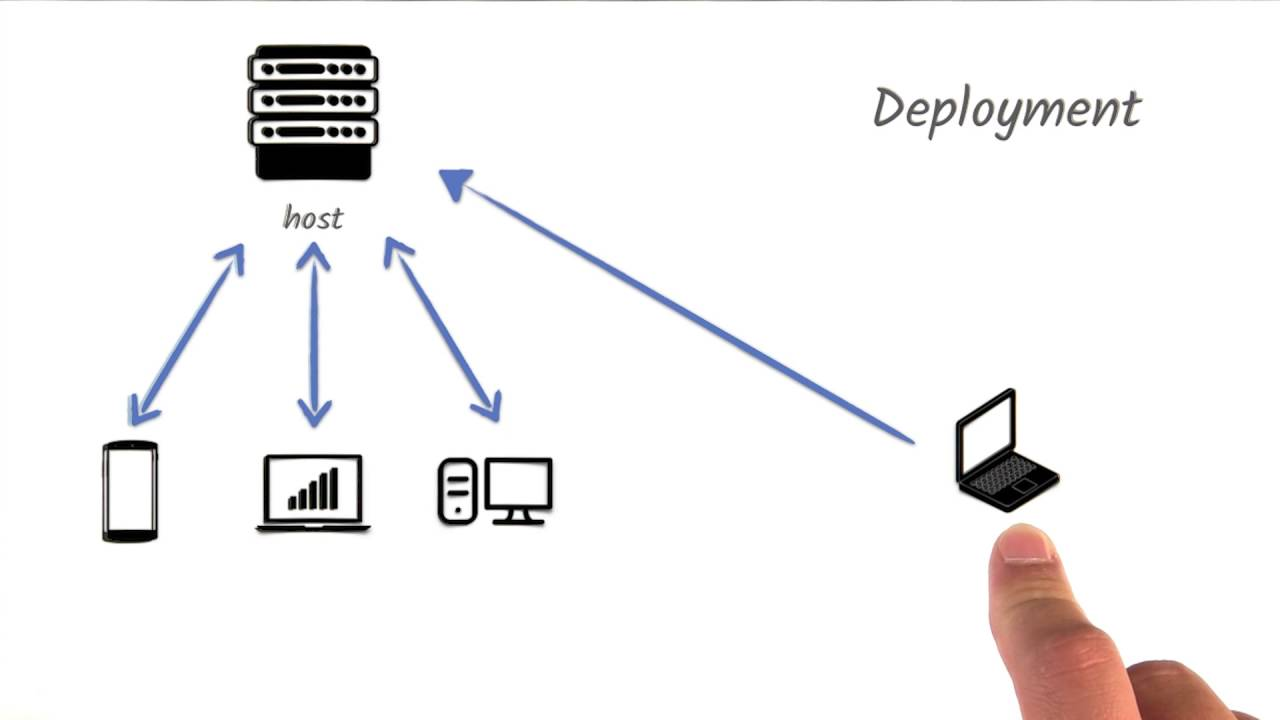

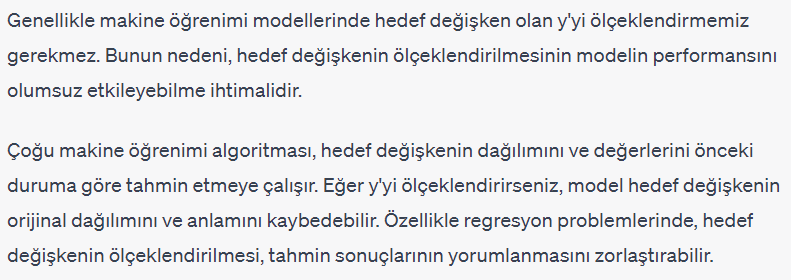

## Final Model and Model Deployment

In [239]:
scaler = MinMaxScaler().fit(X)

Final modelde, MinMaxScaler kullanarak veri ölçeklendirmesi yapılması gerekir. Bu, özellikle makine öğrenmesi modeli kullanarak tahmin yaparken veri özelliklerinin ölçeklendirilmesi ile ilgilidir.

MinMaxScaler, verileri 0 ile 1 arasında ölçeklemek için kullanılan bir ölçeklendirme yöntemidir. Bu yöntem, verilerin orijinal aralığını korur ve verilerin özelliklerinin benzer aralıklarda olmasını sağlar. Bu, bir özelliğin diğer özellikler tarafından domine edilmesini önleyerek, modelin daha iyi çalışmasına yardımcı olur.

Özellikle, makine öğrenmesi algoritmaları, verilerin ölçeklenmesinden büyük ölçüde etkilenir. Bazı algoritmalar, ölçeklendirilmiş veriler üzerinde daha iyi sonuçlar verirken, ölçeklenmemiş veriler üzerinde hatalar yapabilirler. Bu nedenle, final modelde de verilerin ölçeklenmesi, daha iyi ve tutarlı sonuçlar elde etmek için önemlidir.

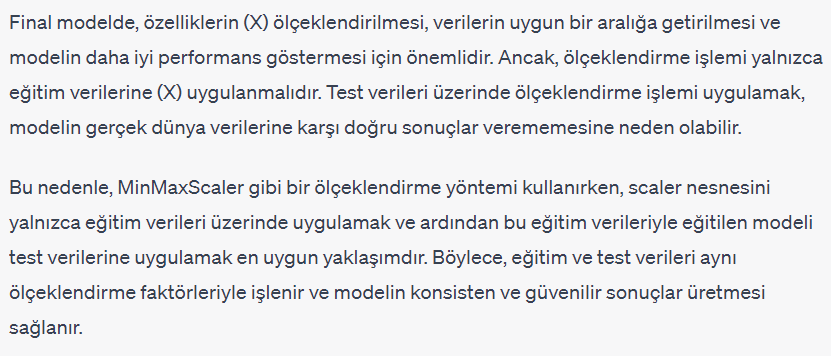

In [240]:
import pickle
pickle.dump(scaler, open("scaler_fake_reg", 'wb'))

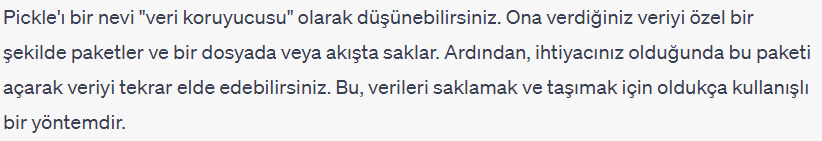

Python'da pickle modülünü kullanarak bir MinMaxScaler nesnesini ("scaler" adıyla) seri hale getirip, "scaler_fake_reg" adlı bir dosyaya yazmayı amaçlar. Bu, modeli tekrar kullanmak istediğimizde, ölçekleyici nesnesini yeniden yükleyebilmemize olanak tanır.

İlk olarak, "pickle" modülü içe aktarılır. Daha sonra, "dump" fonksiyonu kullanılarak "scaler" adlı MinMaxScaler nesnesi, "wb" modunda (yani yazma ve ikili modda) açılan "scaler_fake_reg" adlı dosyaya seri hale getirilir ve yazılır. Bu, ölçekleyici nesnesinin dosyaya kaydedilmesini sağlar.

Bu yöntem, modelin veriye göre ölçeklendirilmesi sırasında kullanılan MinMaxScaler nesnesini kaydetmemizi sağlar. Daha sonra modeli yeniden kullanmak istediğimizde, kaydedilen nesneyi kullanarak yeni verileri aynı şekilde ölçeklendirebiliriz.

In [241]:
X_scaled = scaler.transform(X)

Final modelde, MinMaxScaler kullanarak veri ölçeklendirme işlemi yapıldıktan sonra, verilerin ölçeklendirilmiş sürümünün elde edilmesi gerekir. Bu, modelin eğitim verileri üzerinde eğitilirken ölçeklenmiş verileri kullanmasını sağlar ve aynı ölçeklendirme işlemi test verileri üzerinde uygulandığında tutarlılık sağlar.

Bu nedenle, "scaler" nesnesi ile "transform" fonksiyonu kullanılarak, "X" veri kümesinin ölçeklendirilmiş sürümü olan "X_scaled" elde edilir. Bu, her özellik için verilerin orijinal aralığını korurken, özelliklerin benzer aralıklarda olmasını sağlar.

Sonuç olarak, model, ölçeklendirilmiş veriler üzerinde eğitildiği için, yeni veriler ölçeklendirildiğinde aynı ölçeklendirme işleminin uygulandığından emin olmak için "transform" fonksiyonu kullanılır. Bu, daha tutarlı ve güvenilir sonuçlar elde etmek için önemlidir.

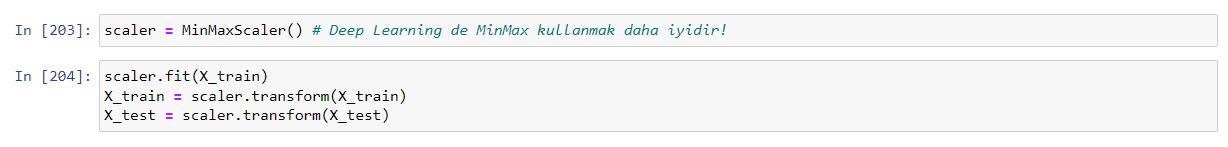

In [242]:
final_model = Sequential()

final_model.add(Dense(units = 4, activation = "relu"))     # input_dim = 2 or input_dim = X_train.shape[0]
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(1))

final_model.compile(optimizer = "rmsprop", loss = "mse")

final_model.fit(x = X_scaled, y = y, batch_size = 32, epochs = 300)

Epoch 1/300
32/32 [==============================] - 7s 2ms/step - loss: 257318.5312
Epoch 2/300
32/32 [==============================] - 0s 2ms/step - loss: 257127.2656
Epoch 3/300
32/32 [==============================] - 0s 2ms/step - loss: 256898.5625
Epoch 4/300
32/32 [==============================] - 0s 2ms/step - loss: 256623.4531
Epoch 5/300
32/32 [==============================] - 0s 2ms/step - loss: 256317.5938
Epoch 6/300
32/32 [==============================] - 0s 2ms/step - loss: 255978.1094
Epoch 7/300
32/32 [==============================] - 0s 2ms/step - loss: 255587.8438
Epoch 8/300
32/32 [==============================] - 0s 2ms/step - loss: 255131.4531
Epoch 9/300
32/32 [==============================] - 0s 2ms/step - loss: 254594.3594
Epoch 10/300
32/32 [==============================] - 0s 2ms/step - loss: 253958.7812
Epoch 11/300
32/32 [==============================] - 0s 2ms/step - loss: 253208.1719
Epoch 12/300
32/32 [==============================] - 0s 2ms/st

32/32 [==============================] - 0s 2ms/step - loss: 24.9625
Epoch 196/300
32/32 [==============================] - 0s 2ms/step - loss: 24.7864
Epoch 197/300
32/32 [==============================] - 0s 2ms/step - loss: 24.4444
Epoch 198/300
32/32 [==============================] - 0s 1ms/step - loss: 24.8992
Epoch 199/300
32/32 [==============================] - 0s 1ms/step - loss: 24.6762
Epoch 200/300
32/32 [==============================] - 0s 1ms/step - loss: 24.4988
Epoch 201/300
32/32 [==============================] - 0s 2ms/step - loss: 24.1923
Epoch 202/300
32/32 [==============================] - 0s 2ms/step - loss: 24.9031
Epoch 203/300
32/32 [==============================] - 0s 2ms/step - loss: 24.9282
Epoch 204/300
32/32 [==============================] - 0s 1ms/step - loss: 24.8115
Epoch 205/300
32/32 [==============================] - 0s 1ms/step - loss: 24.7126
Epoch 206/300
32/32 [==============================] - 0s 1ms/step - loss: 24.5848
Epoch 207/300
32/3

H5 is a file format to store structured data, it's not a model by itself. Keras saves models in this format as it can easily store the weights and model configuration in a single file.

In [243]:
final_model.save('model_fake_reg.h5')  # creates a HDF5 file 'my_model.h5'

HDF5 (H5) dosya biçimi, büyük veri kümeleri için optimize edilmiş bir dosya formatıdır. Bu nedenle, derin öğrenme modeli gibi büyük veri setleriyle çalışırken, modelin tüm ağırlıklarını ve yapısını depolamak için H5 dosya biçimi kullanmak daha uygun olabilir. H5 dosyaları, büyük veri kümelerini hızlı ve kolay bir şekilde depolamak, yükleme, paylaşmak ve işlemek için kullanılan bir veri depolama formatıdır.

Özellikle, yapay sinir ağı (ANN) modelleri, ağ yapılarının ve ağırlıklarının büyüklüğü nedeniyle çok fazla bellek kullanabilirler. Bu nedenle, modelin tüm yapılarını ve ağırlıklarını H5 dosyası biçiminde kaydetmek, modeli daha sonra yeniden yüklemek için kolay bir yöntemdir.

Ayrıca, H5 dosyaları, farklı programlama dillerinde (Python, R, Matlab vb.) kodlanmış uygulamalar arasında veri paylaşımını kolaylaştırır. Bu, modeli paylaşmanın ve farklı ortamlarda kullanmanın daha kolay hale gelmesini sağlar.

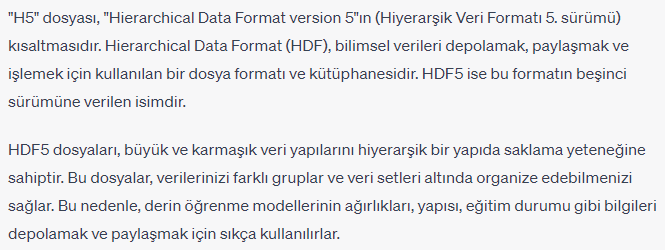

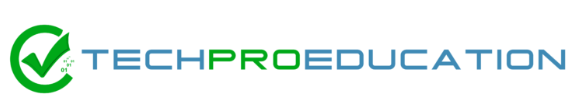

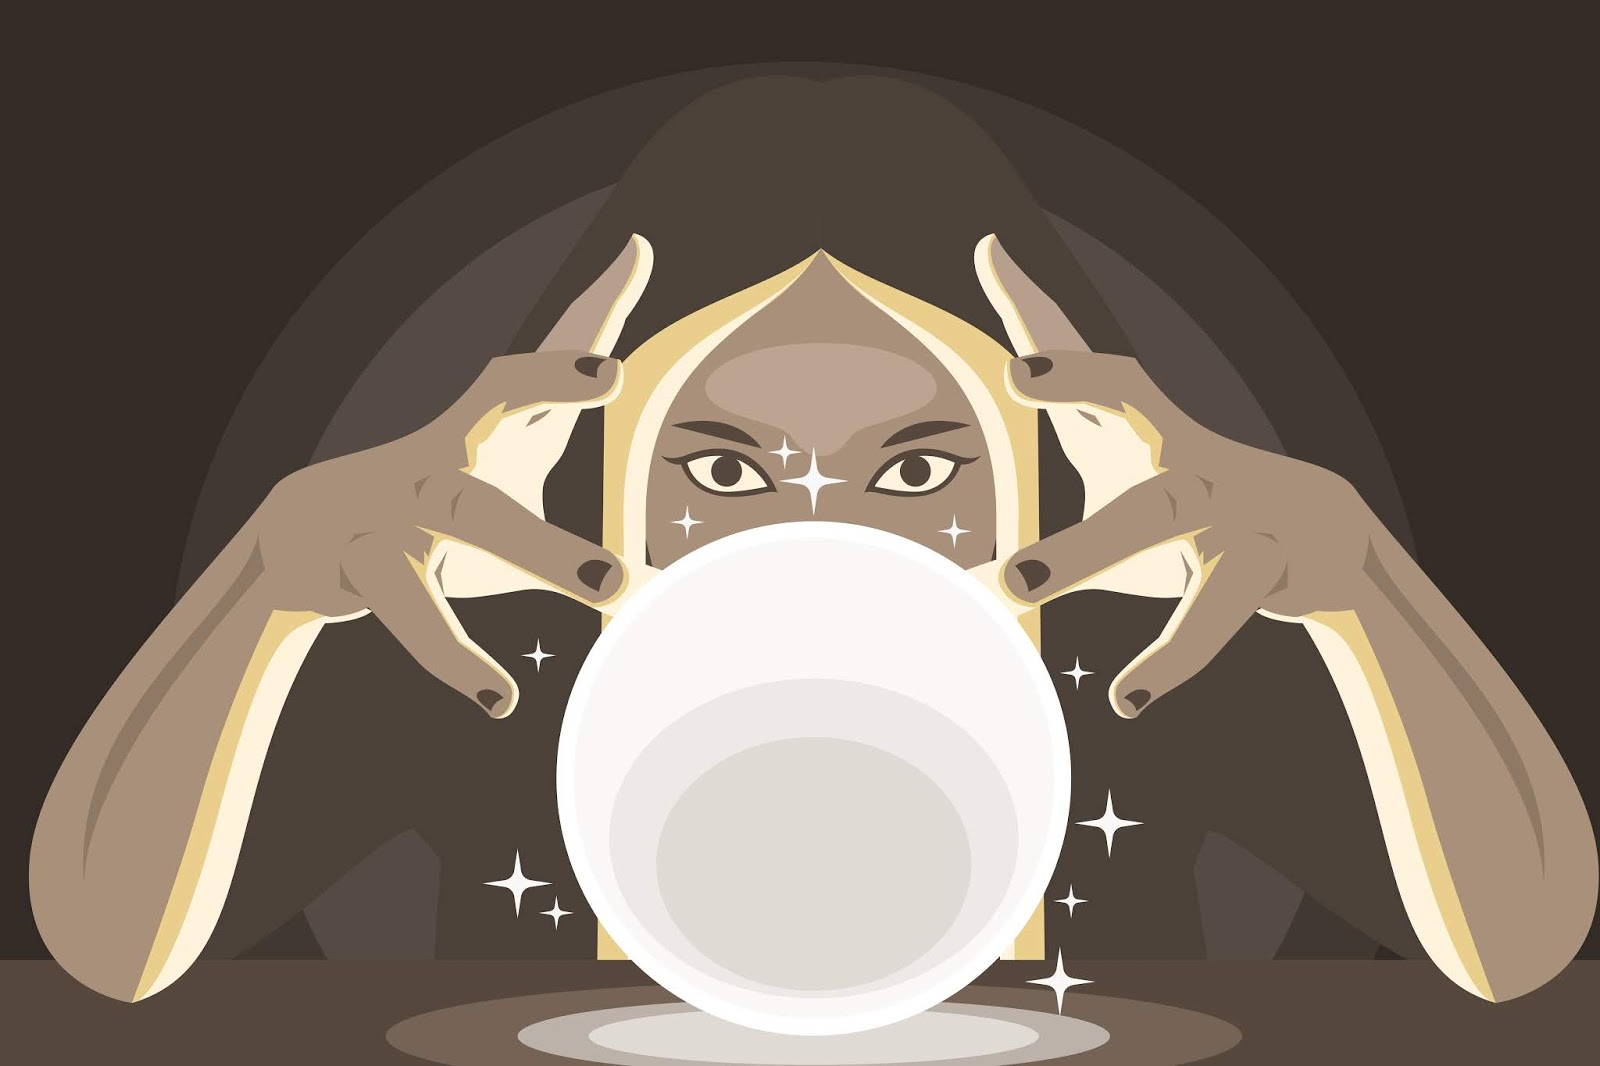

## Prediction-1

In [244]:
from tensorflow.keras.models import load_model # modeli  yükleriz 

bir yapay sinir ağı modelinin yüklenmesi ve önceden kaydedilen bir ölçekleyici (scaler) nesnesinin kullanılmasıyla bir tahminin nasıl yapıldığını göstermektedir. Açıklamak gerekirse:

model_fake_reg adlı bir yapay sinir ağı modeli yükleniyor. Bu model, bir önceki aşamada kaydedilmiş bir model_fake_reg.h5 dosyasından yükleniyor.
scaler_fake_reg adlı bir ölçekleyici (MinMaxScaler gibi) nesnesi, pickle kütüphanesi kullanılarak yükleniyor. Bu ölçekleyici, verileri ölçeklendirirken kullanıldığından, orijinal verilere uygun bir şekilde ölçeklendirme yapabilmek için geri yükleniyor.
sample adlı bir girdi örneği oluşturuluyor. Bu örnek, modelin tahmin yapacağı girdi değerlerini temsil ediyor.
scaler_fake_reg ölçekleyici nesnesi kullanılarak sample örneği ölçekleniyor. Bu, girdi değerlerini modelin öğrenmiş olduğu ölçek aralığına getirir.
Son olarak, ölçeklenmiş sample_scaled verisi, model_fake_reg adlı model kullanılarak tahmin ediliyor. Tahmin sonucu, array([[421.92322]], dtype=float32) olarak elde ediliyor.
Bu kod, öğrenilmiş bir modeli ve ölçekleyici nesnesini kullanarak yeni girdi değerleri için tahmin yapmanın nasıl yapıldığını göstermektedir.

In [245]:
model_fake_reg = load_model('model_fake_reg.h5')

In [246]:
scaler_fake_reg = pickle.load(open("scaler_fake_reg", "rb"))

In [247]:
sample = [[998, 1000]]

In [248]:
sample_scaled = scaler_fake_reg.transform(sample)

In [249]:
model_fake_reg.predict(sample_scaled)

array([[421.92322]], dtype=float32)

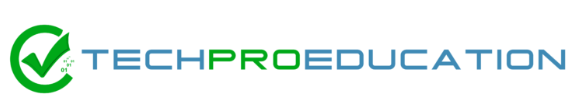

## Prediction-2

In [250]:
my_dict = {"Feature1": [997, 998, 999, 1000, 1001],  # birden fazla değerrleride pred yapabiliriz.
           "Feature2": [1000, 999, 998, 997, 996]}   # scale yaptığımızdan array olarak sonuç vereceği için array a çevirmeye gerek yok

In [251]:
sample = pd.DataFrame(my_dict)
sample

Feature1  Feature2
0       997      1000
1       998       999
2       999       998
3      1000       997
4      1001       996

In [252]:
sample_scaled = scaler_fake_reg.transform(sample)
sample_scaled

array([[-0.00948799,  0.52980619],
       [ 0.15312457,  0.35345977],
       [ 0.31573713,  0.17711336],
       [ 0.47834969,  0.00076694],
       [ 0.64096225, -0.17557948]])

In [253]:
model_fake_reg.predict(sample_scaled)

array([[381.57098],
       [333.01697],
       [284.46295],
       [235.90895],
       [187.3549 ]], dtype=float32)

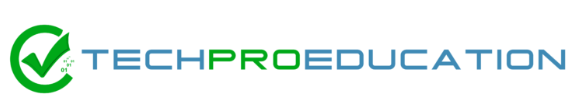